<a href="https://colab.research.google.com/github/rachPD/handwritten_digits_classification/blob/main/handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
(X_train, y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
# gives the size of the train data set shape 
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

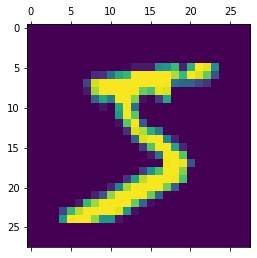

In [ ]:
# matplot to see the image of 0
plt.matshow(X_train[0])

In [ ]:
y_train[4]

9

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# scaling the values foe better accuracy
X_train = X_train/255
X_test = X_test/255

In [ ]:
# flatten the dataset
# using reshape in pandas
# for entire train data each have 28*28 matrix size we need to reshape flatten it
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape
X_train_flattened.shape

(60000, 784)

In [ ]:

# creating a simple nural network with input(flattened) layer and the output layer
# sequential groups a liner stack of layers
model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.4724 - accuracy: 0.8754
Epoch 2/5
1875/1875 [==============================] - 2s 842us/step - loss: 0.3045 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 839us/step - loss: 0.2832 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 837us/step - loss: 0.2731 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 842us/step - loss: 0.2667 - accuracy: 0.9255


In [ ]:
 # evaluating the accuracy on test dataset
  model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 676us/step - loss: 0.2690 - accuracy: 0.9236


[0.26899778842926025, 0.9236000180244446]

In [ ]:
# prediction of all my sample images
model.predict(X_test_flattened)

array([[3.09944749e-02, 3.30560624e-07, 4.49956954e-02, ...,
        9.99801517e-01, 1.13290101e-01, 6.93490028e-01],
       [4.21076924e-01, 5.52389026e-03, 9.99005556e-01, ...,
        1.45979149e-12, 2.00586081e-01, 4.79502305e-09],
       [4.77194786e-04, 9.93371308e-01, 6.03371441e-01, ...,
        1.62113845e-01, 4.01376665e-01, 4.47598994e-02],
       ...,
       [4.54359906e-06, 2.87607327e-06, 8.14259052e-04, ...,
        2.19449997e-01, 5.61761379e-01, 7.98088908e-01],
       [1.53034925e-04, 1.85936689e-04, 1.18871561e-04, ...,
        6.61170779e-05, 7.20179975e-01, 1.19617565e-04],
       [5.62196970e-03, 2.39151698e-10, 1.47902429e-01, ...,
        2.82272907e-08, 2.36064196e-04, 1.28626925e-06]], dtype=float32)

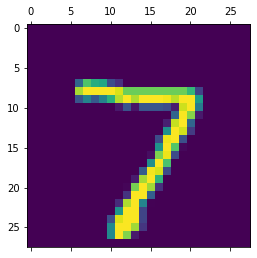

In [ ]:
plt.matshow(X_test[0])

In [ ]:
# seeing the 10 predicted values(0 to 9 by going through the entire neural network) from outter layer of the 1st image that is 7
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.0994475e-02, 3.3056062e-07, 4.4995695e-02, 9.6199924e-01,
       2.5117397e-03, 1.0900593e-01, 1.5823812e-06, 9.9980152e-01,
       1.1329010e-01, 6.9349003e-01], dtype=float32)

In [ ]:
# finding the max value from this array then printing index of that
np.argmax(y_predicted[0])

7

In [ ]:
# new vales of y_predicted as the ones were whole values
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
# for checking where went wrong using confusion matrix
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    6,    4,    3,    2,    1],
       [   0, 1110,    2,    2,    0,    1,    4,    2,   14,    0],
       [   8,   10,  905,   24,    7,    5,   11,   11,   46,    5],
       [   2,    0,   13,  929,    0,   20,    2,   12,   24,    8],
       [   1,    1,    3,    1,  905,    0,   11,    5,   10,   45],
       [   9,    3,    2,   42,    7,  769,   11,    8,   34,    7],
       [   9,    3,    9,    1,    7,   16,  907,    2,    4,    0],
       [   1,    5,   20,    7,    5,    0,    0,  955,    3,   32],
       [   7,    7,    5,   21,    9,   24,    8,   12,  875,    6],
       [  11,    7,    1,   10,   25,    7,    0,   22,    6,  920]],
      dtype=int32)>

In [ ]:
# adding 1 hidden layers to improve perfomance
# last layer doesn need any input shape as can figure out form 1st layers
# now taking number of nurons ans 100
model = keras.Sequential([
       keras.layers.Dense(100,input_shape=(784,),activation='relu'),
       keras.layers.Dense(10,activation='sigmoid')
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2673 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1197 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0857 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0634 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0503 - accuracy: 0.9847


Text(69.0, 0.5, 'truth')

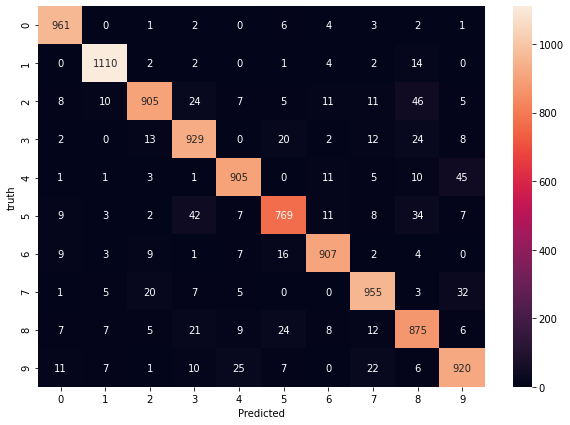

In [ ]:
# checking error using confusion matrix
import seaborn as sn
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')

In [ ]:
# no need to create flatten array use keras function
model = keras.Sequential([
       keras.layers.Flatten(input_shape=(28,28)),
       keras.layers.Dense(100,activation='relu'),
       keras.layers.Dense(10,activation='sigmoid')
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1238 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0873 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0664 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0526 - accuracy: 0.9840
